In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [8]:
tickers = ['SSL','CL=F']

ind_data = pd.DataFrame()

for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source='yahoo', start='2015-1-1',)['Close']

In [10]:
ind_data.tail(10)

,SSL,CL=F
Date,,
2020-04-20,3.00,-2.720000
2020-04-21,3.01,9.060000
2020-04-22,3.16,11.570000
2020-04-23,3.45,17.170000
2020-04-24,3.61,17.180000
2020-04-27,4.08,12.340000
2020-04-28,4.34,13.400000
2020-04-29,5.13,12.340000
2020-04-30,4.78,15.060000


## Normalization
-start from the same point

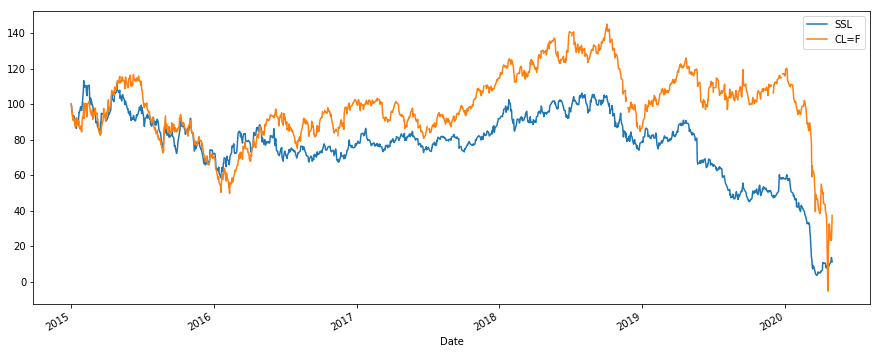

In [11]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()

## Returns

In [12]:
ind_data.dropna(inplace=True)
ind_data.tail()

,SSL,CL=F
Date,,
2020-04-27,4.08,12.340000
2020-04-28,4.34,13.400000
2020-04-29,5.13,12.340000
2020-04-30,4.78,15.060000
2020-05-01,4.21,19.690001


In [13]:
returns=(ind_data/ind_data.shift(1))-1

In [14]:
#average annual returns
returns.mean() * 250

SSL    -0.228982
CL=F   -0.940495
dtype: float64

## Correlation Returns

In [15]:
#correlation 
returns.corr()

,SSL,CL=F
SSL,1.000000,0.078433
CL=F,0.078433,1.000000


## Correlation of Price

In [16]:
ind_data.corr()

,SSL,CL=F
SSL,1.00000,0.55562
CL=F,0.55562,1.00000


In [19]:
print("Price Correlation :%.1f%%" %(ind_data.corr()["CL=F"].iloc[0]*100))
print("Returns Correlation: :%.1f%%" %(returns.corr()["CL=F"].iloc[0]*100))

Price Correlation :55.6%
Returns Correlation: :7.8%
